In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors

In [2]:
areas = gpd.read_file( '../../data/aree.geojson' )
areas = areas[["geometry", "NOME_AT"]] # shows epsg:3004, but it's wrong
areas = areas.rename( columns = { "NOME_AT" : "frazione" } )
areas = areas.set_crs( "epsg:4326", allow_override = True )
areas = areas.to_crs( epsg = 32633 ) #utm
# print(areas.head(3))
# areas.plot( column = 'frazione' )

In [3]:
families = pd.read_csv( '../../data/fam.csv' )
families = families.rename( columns = { 'AREA TERRITORIALE' : 'frazione'} )
families.loc[ (families['frazione'].str.contains('ALBERTO')), 'frazione' ] = 'SANT\'ALBERTO'
families_line = families.set_index('frazione').transpose()
# print(families.head())
print(families_line.head)

<bound method NDFrame.head of frazione  CENTRO URBANO  RAVENNA SUD  DARSENA  SANT'ALBERTO  MEZZANO  \
2005              17059        16986     8031          1583     3353   
2006              17271        17430     8285          1600     3366   
2007              17599        17900     8399          1627     3453   
2008              17968        18326     8516          1658     3533   
2009              18236        18544     8652          1701     3589   
2010              18478        18748     8768          1702     3684   
2011              18697        18918     8948          1726     3733   
2012              18790        19010     9080          1740     3768   
2013              18622        18913     9135          1714     3788   

frazione  PIANGIPANE  RONCALCECI  SAN PIETRO IN VINCOLI  CASTIGLIONE  DEL MARE  
2005            2492        1396                   3934         3247      8529  
2006            2607        1469                   4049         3381      8568  
2007  

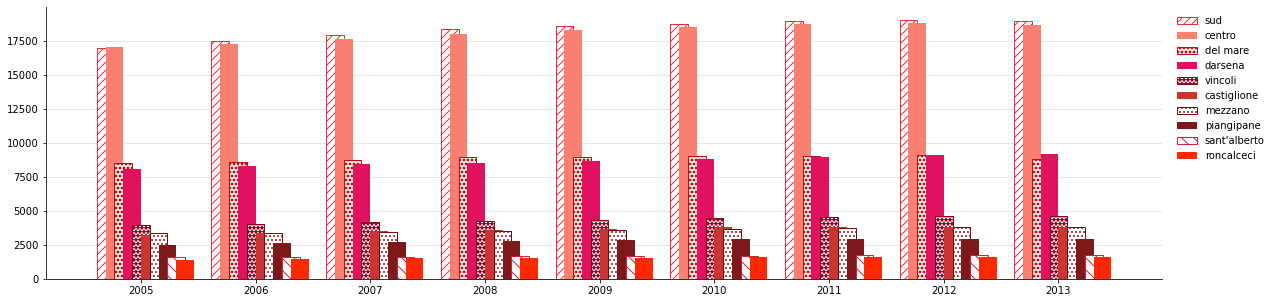

In [4]:
barWidth = 1

years = families_line.index.array

centro = families_line['CENTRO URBANO'].array
sud = families_line['RAVENNA SUD'].array
darsena = families_line['DARSENA'].array
alberto = families_line['SANT\'ALBERTO'].array
mezzano = families_line['MEZZANO'].array
piangipane = families_line['PIANGIPANE'].array
roncalceci = families_line['RONCALCECI'].array
vincoli = families_line['SAN PIETRO IN VINCOLI'].array
castiglione = families_line['CASTIGLIONE'].array
mare = families_line['DEL MARE'].array

# print(type(centro))
# print(centro)

r1 = np.arange(len(centro)) * 6.5
r2 = [x + barWidth * 0.5 for x in r1]
r3 = [x + barWidth * 0.5 for x in r2]
r4 = [x + barWidth * 0.5 for x in r3]
r5 = [x + barWidth * 0.5 for x in r4]
r6 = [x + barWidth * 0.5 for x in r5]
r7 = [x + barWidth * 0.5 for x in r6]
r8 = [x + barWidth * 0.5 for x in r7]
r9 = [x + barWidth * 0.5 for x in r8]
r10 = [x + barWidth * 0.5 for x in r9]

fig, ax = plt.subplots( figsize = (20, 5) )

plt.bar(r1, sud, hatch='///', edgecolor='#ed2939', width=barWidth, color='white', label='sud', alpha=.99)
plt.bar(r2, centro, color='#fa8072', width=barWidth, label='centro')
plt.bar(r3, mare, hatch='ooo', edgecolor='#b80f0a', width=barWidth, color='white', label='del mare', alpha=.99)
plt.bar(r4, darsena, color='#e0115f', width=barWidth, label='darsena')
plt.bar(r5, vincoli, hatch='***', edgecolor='#8d021f', width=barWidth, color='white', label='vincoli', alpha=.99)
plt.bar(r6, castiglione, color='#ca3433', width=barWidth, label='castiglione')
plt.bar(r7, mezzano, hatch='...', edgecolor='#800000', width=barWidth, color='white', label='mezzano', alpha=.99)
plt.bar(r8, piangipane, color='#7e191b', width=barWidth, label='piangipane')
plt.bar(r9, alberto, hatch='\\\\', edgecolor='#d21f3c', width=barWidth, color='white', label='sant\'alberto', alpha=.99)
plt.bar(r10, roncalceci, color='#ff2800', width=barWidth, label='roncalceci')

plt.xticks(r5, years)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.grid(color = '#e0e0e0')
ax.set_axisbelow(True)

plt.legend( bbox_to_anchor = (1.1, 1), frameon = False )

plt.savefig( 'families-over-time.jpg', dpi = 150 )

In [5]:
def inter_from_256(x):
    return np.interp(x=x,xp=[0,255],fp=[0,1])

cdict = {
    'red' : ((0.0, 1, 1),
            (1.0, inter_from_256(197), inter_from_256(197))),
    'green' : ((0.0, 1, 1),
            (1.0, inter_from_256(12), inter_from_256(12))),
    'blue' : ((0.0, 1, 1),
            (1.0, inter_from_256(48), inter_from_256(48)))
    }
r_grd = matplotlib.colors.LinearSegmentedColormap('r_grd', segmentdata=cdict)

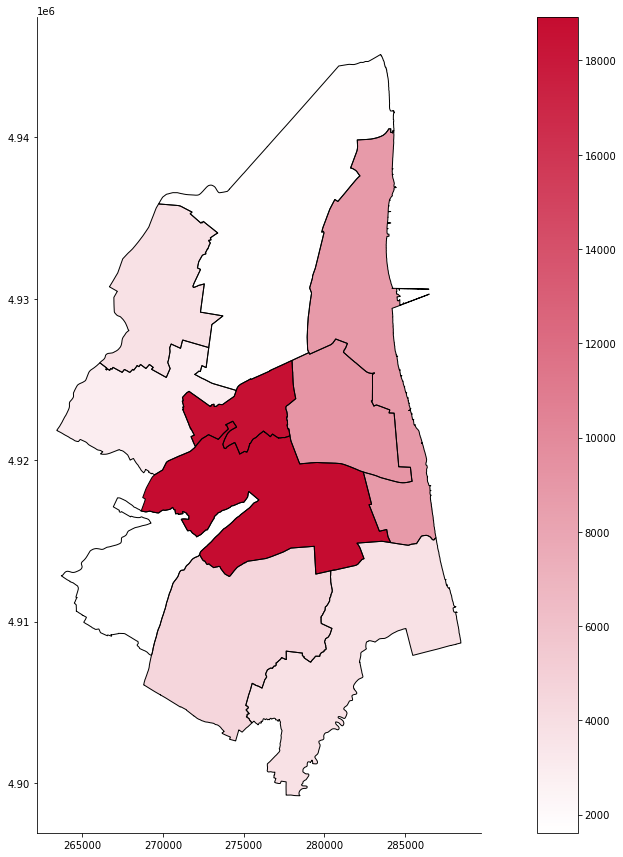

In [6]:
families_areas = pd.merge( areas, families, on = 'frazione' )

fig, ax = plt.subplots( figsize = (20, 15) )
base = families_areas.plot( ax = ax, 
                           column = '2013', 
                           cmap = r_grd, 
                           legend = True 
                          )
areas.plot( ax = ax, 
           color = 'none', 
           edgecolor = 'black' 
          )
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig( 'families-map.jpg', dpi = 150 )